Applying machine learning to Agriculture data to predict the Crop Damage. We will analyze the data to create a prediction model to predict the crop damage.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [2]:
#reading the data
df=pd.read_csv("train_agriculture.csv")

In [3]:
df.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1


In [4]:
#Lets check the details on data
df.describe()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
count,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4157.000000,4599.000000,4599.000000,4599.000000
mean,1363.000435,0.224831,0.476625,2.283540,26.477495,28.891027,9.205479,1.894325,0.194390
std,814.439120,0.417517,0.499508,0.471978,15.524647,12.586005,9.713253,0.694952,0.454597
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,731.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000,0.000000
50%,1212.000000,0.000000,0.000000,2.000000,20.000000,28.000000,7.000000,2.000000,0.000000
75%,1786.000000,0.000000,1.000000,3.000000,40.000000,38.000000,16.000000,2.000000,0.000000
max,4097.000000,1.000000,1.000000,3.000000,95.000000,66.000000,47.000000,3.000000,2.000000


In [5]:
#Lets check the column types, null and non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4599 entries, 0 to 4598
Data columns (total 10 columns):
ID                         4599 non-null object
Estimated_Insects_Count    4599 non-null int64
Crop_Type                  4599 non-null int64
Soil_Type                  4599 non-null int64
Pesticide_Use_Category     4599 non-null int64
Number_Doses_Week          4599 non-null int64
Number_Weeks_Used          4157 non-null float64
Number_Weeks_Quit          4599 non-null int64
Season                     4599 non-null int64
Crop_Damage                4599 non-null int64
dtypes: float64(1), int64(8), object(1)
memory usage: 359.4+ KB


In [6]:
#Lets check the null values in each column
df.isnull().sum()

ID                           0
Estimated_Insects_Count      0
Crop_Type                    0
Soil_Type                    0
Pesticide_Use_Category       0
Number_Doses_Week            0
Number_Weeks_Used          442
Number_Weeks_Quit            0
Season                       0
Crop_Damage                  0
dtype: int64

In [7]:
df["Number_Weeks_Used"].fillna(0, inplace=True)

In [8]:
df.isnull().sum()

ID                         0
Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
Crop_Damage                0
dtype: int64

In [9]:
df.nunique()

ID                         4599
Estimated_Insects_Count      71
Crop_Type                     2
Soil_Type                     2
Pesticide_Use_Category        3
Number_Doses_Week            20
Number_Weeks_Used            63
Number_Weeks_Quit            47
Season                        3
Crop_Damage                   3
dtype: int64

In [10]:
df.drop('ID',axis=1,inplace=True)

In [11]:
df.head()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,188,1,0,1,0,0.0,0,1,0
1,209,1,0,1,0,0.0,0,2,1
2,257,1,0,1,0,0.0,0,2,1
3,257,1,1,1,0,0.0,0,2,1
4,342,1,0,1,0,0.0,0,2,1


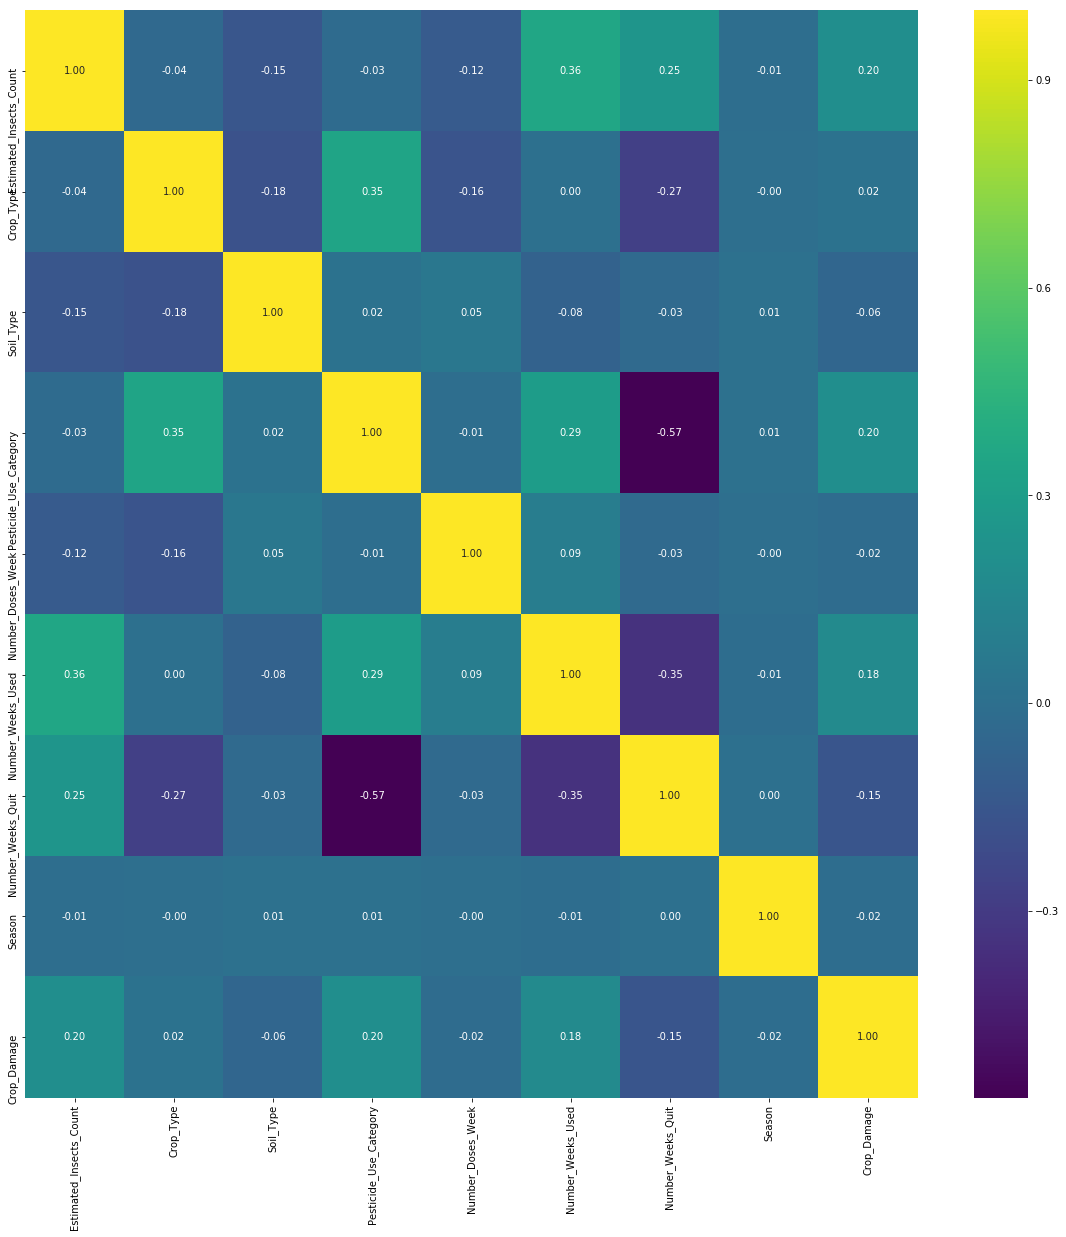

In [12]:
corr = df[df.columns].corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr,annot=True,fmt='.2f',cmap='viridis')

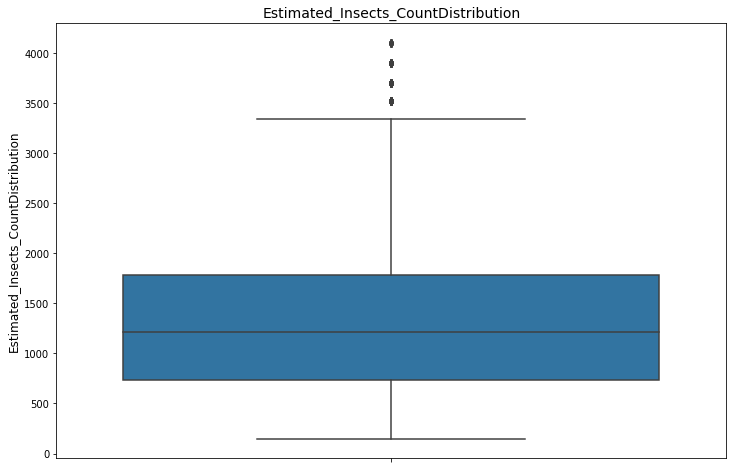

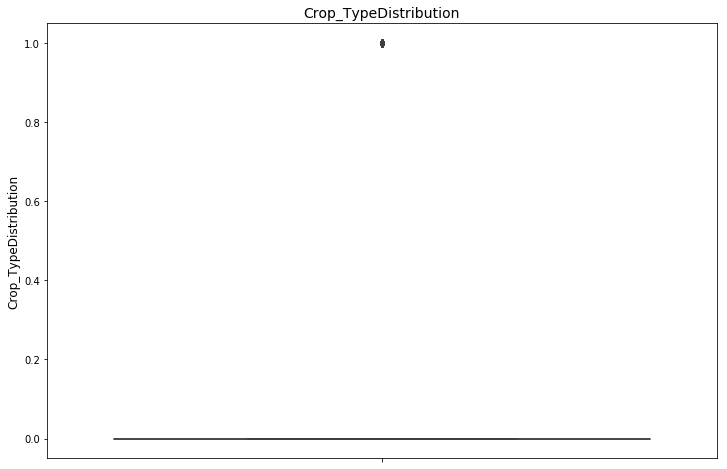

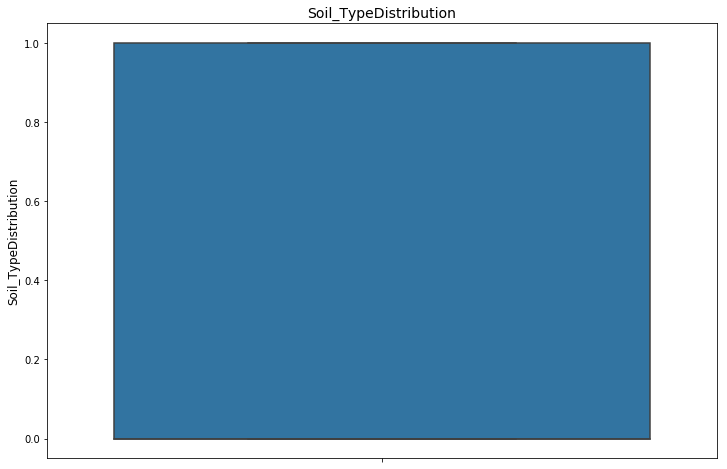

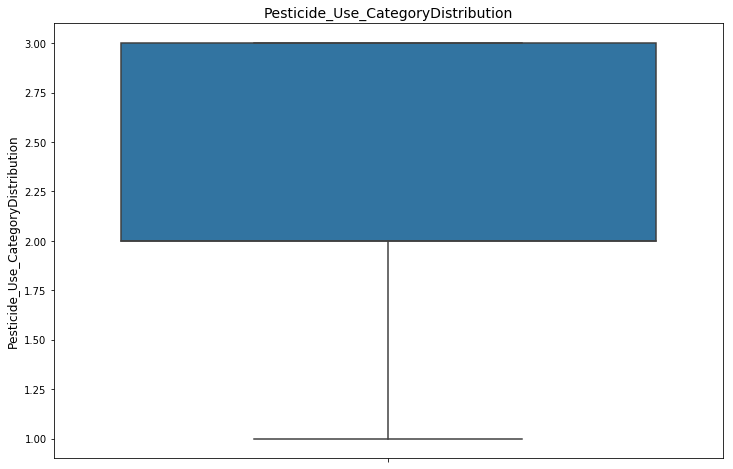

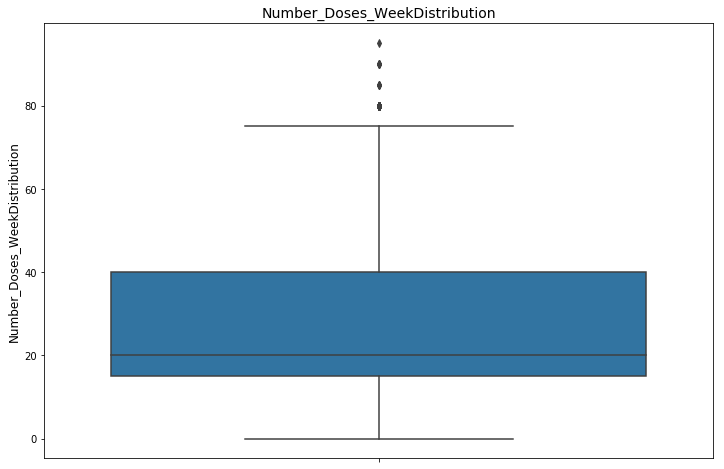

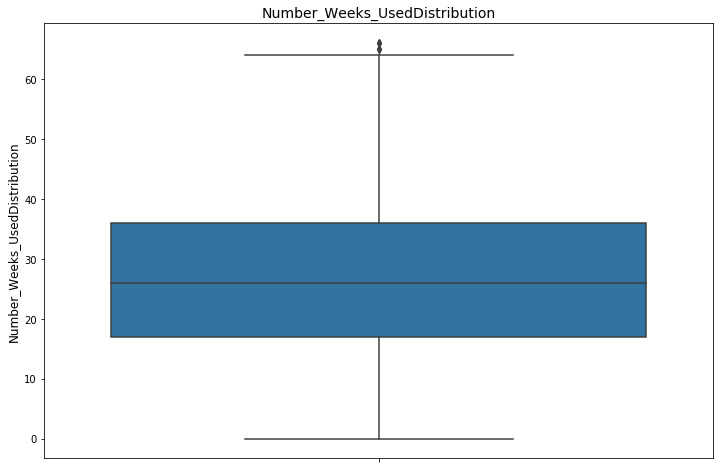

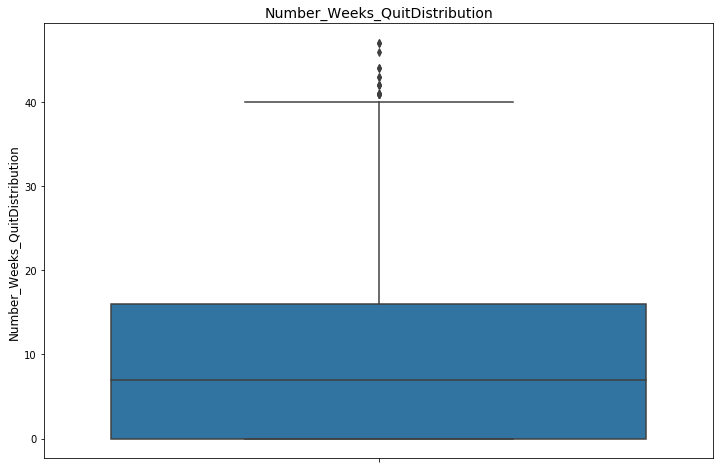

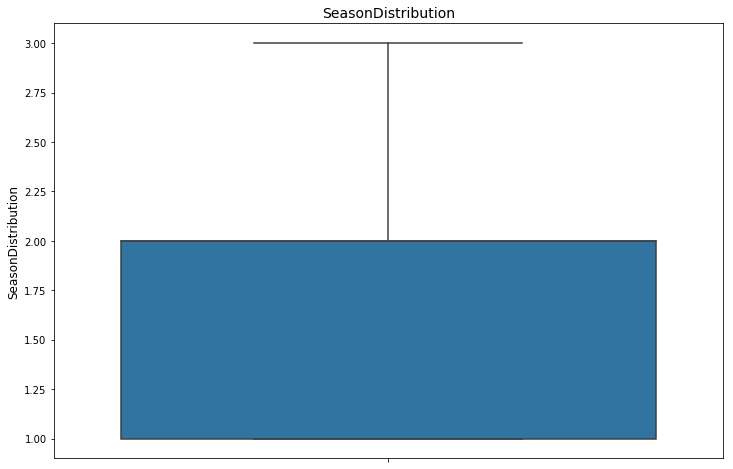

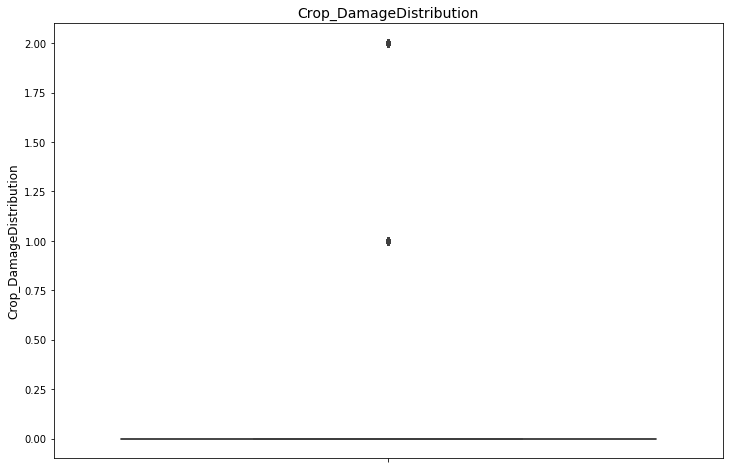

In [13]:
dx=df[['Estimated_Insects_Count','Crop_Type','Soil_Type','Pesticide_Use_Category','Number_Doses_Week','Number_Weeks_Used','Number_Weeks_Quit','Season','Crop_Damage']]
for i in dx.columns:
    plt.figure(figsize=(12,8))
    sns.boxplot(y=i, data=df)
    plt.ylabel(i+'Distribution', fontsize=12)
    plt.title(i+"Distribution", fontsize=14)
    plt.xticks(rotation='vertical')
    plt.show()

In [14]:
y=df['Crop_Damage']
df.drop(['Crop_Damage'],axis=1,inplace=True)

In [15]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
sdss = scaler.fit_transform(df)

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, precision_score, recall_score

In [17]:
X_train, X_test, y_train, y_test = train_test_split(sdss, y, test_size=0.2, random_state=2)

In [18]:
#importing library for classification prediction
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [19]:
models = []

models.append(("K-Nearest Neighbour:",KNeighborsClassifier(n_neighbors=3)))
models.append(("Decision Tree:",DecisionTreeClassifier()))
models.append(("Random Forest:",RandomForestClassifier(n_estimators=7)))
models.append(("AdaBoostClassifier:",AdaBoostClassifier()))
models.append(("GradientBoostingClassifier:",GradientBoostingClassifier()))

print('Models appended...')

Models appended...


In [20]:
results = []
names = []
for name,model in models:
    kfold = KFold(n_splits=10, random_state=0)
    cv_result = cross_val_score(model,X_train,y_train.values.ravel(), cv = kfold,scoring = "accuracy")
    names.append(name)
    results.append(cv_result)
for i in range(len(names)):
    print(names[i],results[i].mean()*100)

K-Nearest Neighbour: 80.04975713777989
Decision Tree: 72.73812344508943
Random Forest: 80.0219168344983
AdaBoostClassifier: 83.28382300675274
GradientBoostingClassifier: 82.68577478971686


In [21]:
p_test3 = {'learning_rate':[0.15,0.1,0.05,0.01,0.005,0.001], 'n_estimators':[100,250,500,750,1000,1250,1500,1750]}

tuning = GridSearchCV(estimator =GradientBoostingClassifier(max_depth=4, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10), 
            param_grid = p_test3, scoring='accuracy',n_jobs=4,iid=False, cv=5)
tuning.fit(X_train,y_train)
tuning.grid_scores_, tuning.best_params_, tuning.best_score_

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.82740, std: 0.00645, params: {'learning_rate': 0.15, 'n_estimators': 100},
  mean: 0.81788, std: 0.01008, params: {'learning_rate': 0.15, 'n_estimators': 250},
  mean: 0.81163, std: 0.00795, params: {'learning_rate': 0.15, 'n_estimators': 500},
  mean: 0.80565, std: 0.00602, params: {'learning_rate': 0.15, 'n_estimators': 750},
  mean: 0.80321, std: 0.00651, params: {'learning_rate': 0.15, 'n_estimators': 1000},
  mean: 0.80457, std: 0.00819, params: {'learning_rate': 0.15, 'n_estimators': 1250},
  mean: 0.80293, std: 0.01031, params: {'learning_rate': 0.15, 'n_estimators': 1500},
  mean: 0.79994, std: 0.01199, params: {'learning_rate': 0.15, 'n_estimators': 1750},
  mean: 0.82876, std: 0.00713, params: {'learning_rate': 0.1, 'n_estimators': 100},
  mean: 0.82495, std: 0.00541, params: {'learning_rate': 0.1, 'n_estimators': 250},
  mean: 0.81489, std: 0.00970, params: {'learning_rate': 0.1, 'n_estimators': 500},
  mean: 0.81245, std: 0.01149, params: {'learning_rate': 0.1, 'n

In [22]:
#Saving the best model for future use
from sklearn.externals import joblib
joblib.dump(tuning,'Agriculture.obj')

['Agriculture.obj']